<a href="https://colab.research.google.com/github/comsa33/AI_07_session_1_project_-/blob/main/ai_07_%E1%84%8B%E1%85%B5%E1%84%85%E1%85%AE%E1%84%8B%E1%85%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind, chisquare, chi2_contingency, f_oneway
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib as mpl

from matplotlib import font_manager, rc


%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumBarunGothic')
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'


plt.rc('font', family='NanumBarunGothic') 

path = "/content/drive/MyDrive/vgames2.csv"

df_vgames = pd.read_csv(path, index_col=0)

df_vgames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [4]:
df_vgames.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [5]:
cols = df_vgames.columns
for col in cols:
    missing_rate = df_vgames[col].isna().sum()/df_vgames.shape[0]
    if missing_rate > 0:
        print('[{}]의 결측치 비율은 {}% 입니다'.format(col, round(missing_rate*100,4)))

[Year]의 결측치 비율은 1.6327% 입니다
[Genre]의 결측치 비율은 0.3012% 입니다
[Publisher]의 결측치 비율은 0.3494% 입니다


In [6]:
df_new = df_vgames.copy()
df_new['Publisher'] = df_new['Publisher'].fillna('Unknown')
df_new = df_new.dropna(axis=0)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16277 non-null  object 
 1   Platform     16277 non-null  object 
 2   Year         16277 non-null  float64
 3   Genre        16277 non-null  object 
 4   Publisher    16277 non-null  object 
 5   NA_Sales     16277 non-null  object 
 6   EU_Sales     16277 non-null  object 
 7   JP_Sales     16277 non-null  object 
 8   Other_Sales  16277 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [7]:
df_new[cols[5]]

1        0.04
2        0.17
3           0
4        0.04
5        0.12
         ... 
16594    0.15
16595    0.01
16596    0.44
16597    0.05
16598       0
Name: NA_Sales, Length: 16277, dtype: object

In [8]:
def unify_num(string):
    if 'K' in string:
        new_string = string.replace('K', '')
        return float(new_string)*0.01
    elif 'M' in string:
        new_string = string.replace('M', '')
        return float(new_string)
    else:
        return float(string)

In [9]:
df_new[cols[5:]] = df_new[cols[5:]].applymap(unify_num)

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16277 non-null  object 
 1   Platform     16277 non-null  object 
 2   Year         16277 non-null  float64
 3   Genre        16277 non-null  object 
 4   Publisher    16277 non-null  object 
 5   NA_Sales     16277 non-null  float64
 6   EU_Sales     16277 non-null  float64
 7   JP_Sales     16277 non-null  float64
 8   Other_Sales  16277 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.2+ MB


In [11]:
df_new.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [12]:
df_new['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

In [13]:
df_new['Genre'] = df_new['Genre'].astype("category")
df_new['Platform'] = df_new['Platform'].astype("category")

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         16277 non-null  object  
 1   Platform     16277 non-null  category
 2   Year         16277 non-null  float64 
 3   Genre        16277 non-null  category
 4   Publisher    16277 non-null  object  
 5   NA_Sales     16277 non-null  float64 
 6   EU_Sales     16277 non-null  float64 
 7   JP_Sales     16277 non-null  float64 
 8   Other_Sales  16277 non-null  float64 
dtypes: category(2), float64(5), object(2)
memory usage: 1.0+ MB


In [14]:
df_new.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [15]:
df_new['Total_Sales'] = df_new[cols[5:]].sum(axis=1)
df_new.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [16]:
def year2str(year):
    if int(year) <= 21:
        year = 2000+int(year)
    elif int(year) < 100 and int(year) > 50:
        year = 1900+int(year)
    return str(int(year))

In [17]:
df_new['Year'] = df_new['Year'].apply(year2str)

In [18]:
set(df_new['Year'].values)

{'1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2020'}

In [19]:
year_genre_df = pd.crosstab(df_new['Year'], df_new['Genre'])
year_genre_df

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,1,0,1,4,0,0,0,0,2,0,0,0
1981,25,0,0,0,3,2,1,0,10,1,4,0
1982,18,0,0,1,5,3,2,0,5,0,2,0
1983,7,1,0,1,5,1,0,0,1,0,1,0
1984,1,0,0,1,1,3,3,0,3,0,2,0
1985,2,0,1,0,4,4,0,0,1,1,1,0
1986,6,0,0,0,6,0,1,1,4,0,3,0
1987,2,1,2,0,2,0,0,3,2,0,4,0
1988,2,0,0,0,4,1,1,3,1,1,2,0


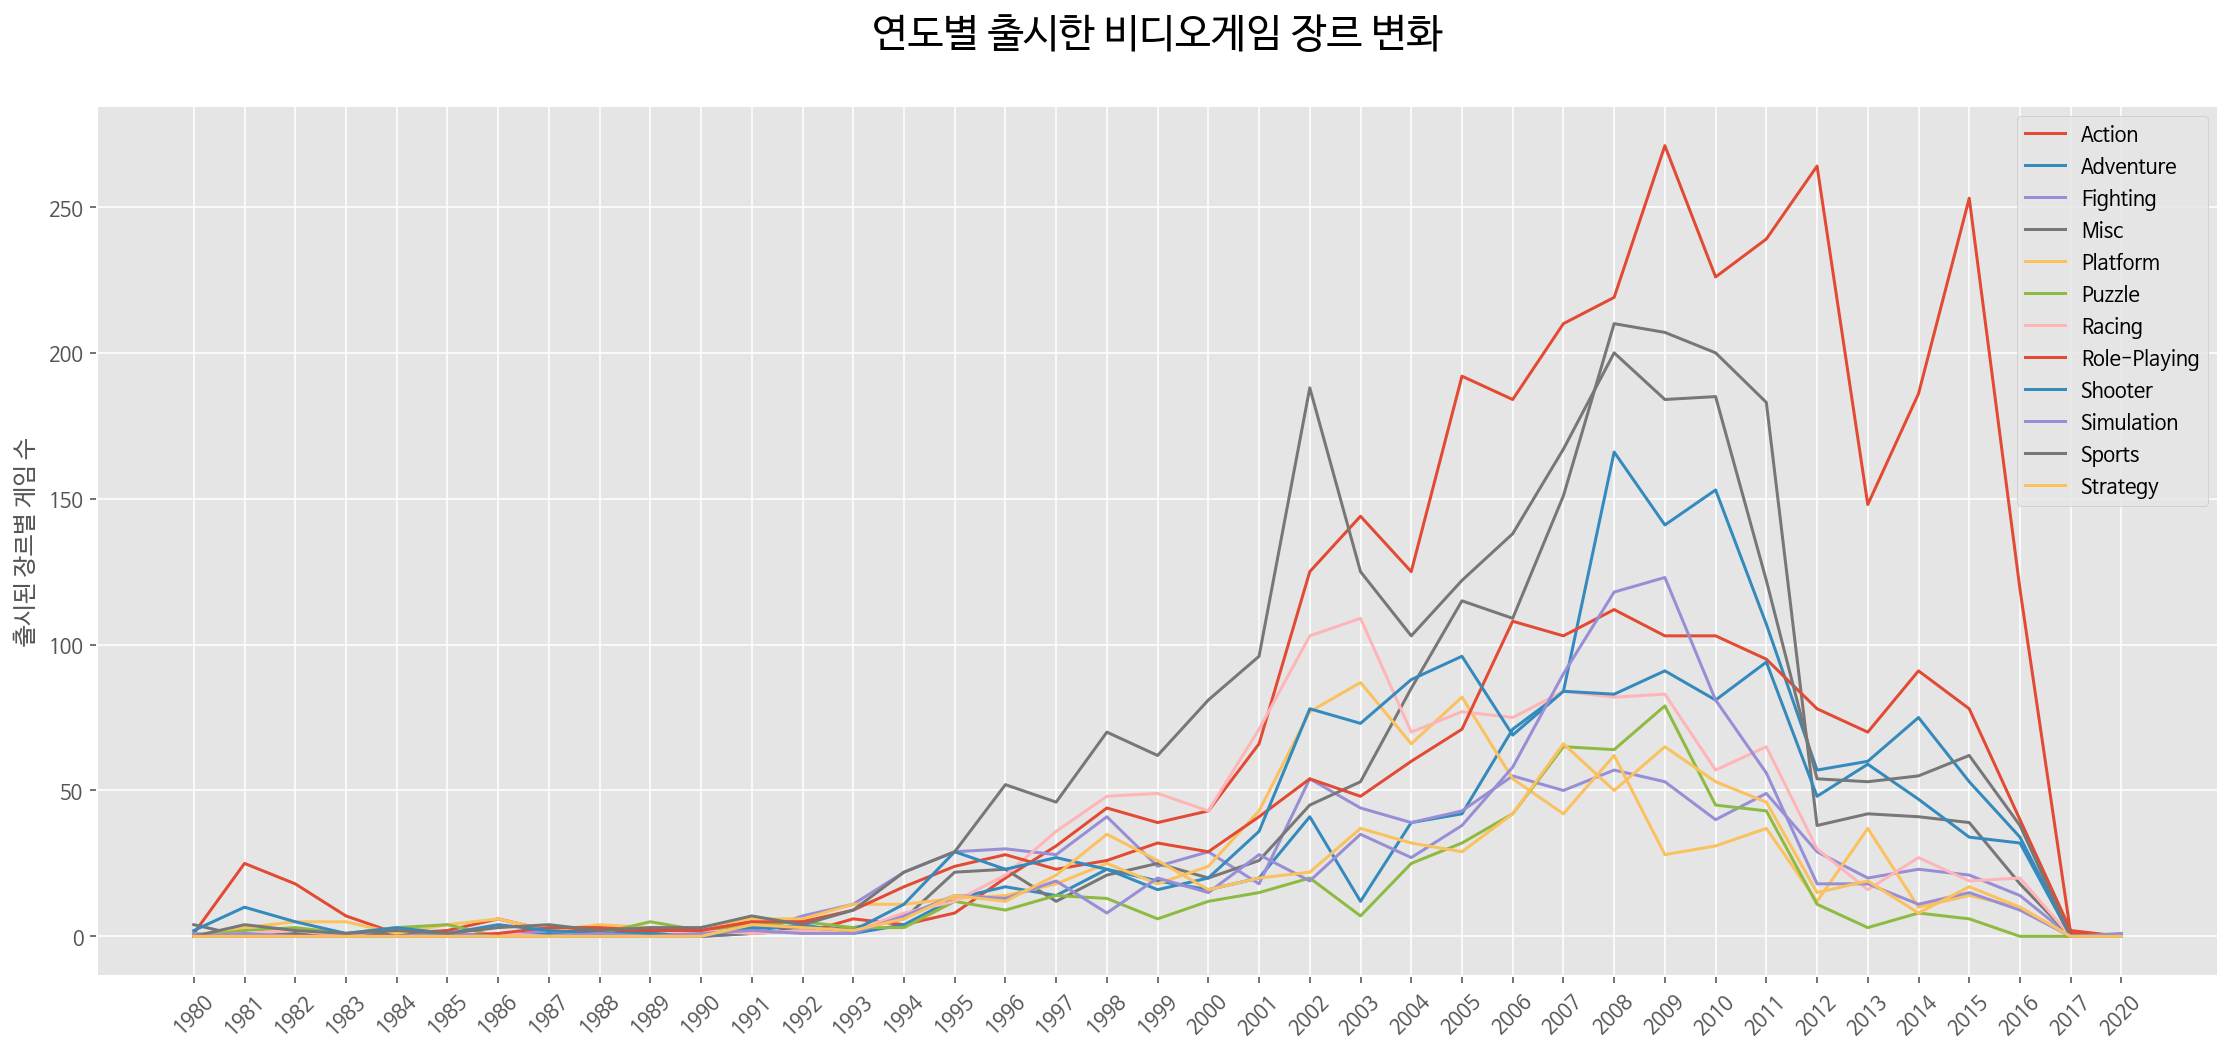

In [262]:
plt.figure(figsize=(19,8))
plt.plot(year_genre_df)
plt.xticks(rotation=45)
plt.legend(year_genre_df.columns)
plt.ylabel('출시된 장르별 게임 수')
plt.title('연도별 출시한 비디오게임 장르 변화\n', fontsize=20)
plt.show()

In [21]:
year_genre_sales_df = df_new.groupby(by=['Year', 'Genre'])['Total_Sales'].sum().reset_index()
year_genre_sales_df.head(10)

,Year,Genre,Total_Sales
0,1980,Action,0.34
1,1980,Adventure,NaN
2,1980,Fighting,0.77
3,1980,Misc,2.70
4,1980,Platform,NaN
5,1980,Puzzle,NaN
6,1980,Racing,NaN
7,1980,Role-Playing,NaN
8,1980,Shooter,7.07
9,1980,Simulation,NaN


In [22]:
yg_sales_pt = year_genre_sales_df.pivot('Year', 'Genre', 'Total_Sales')

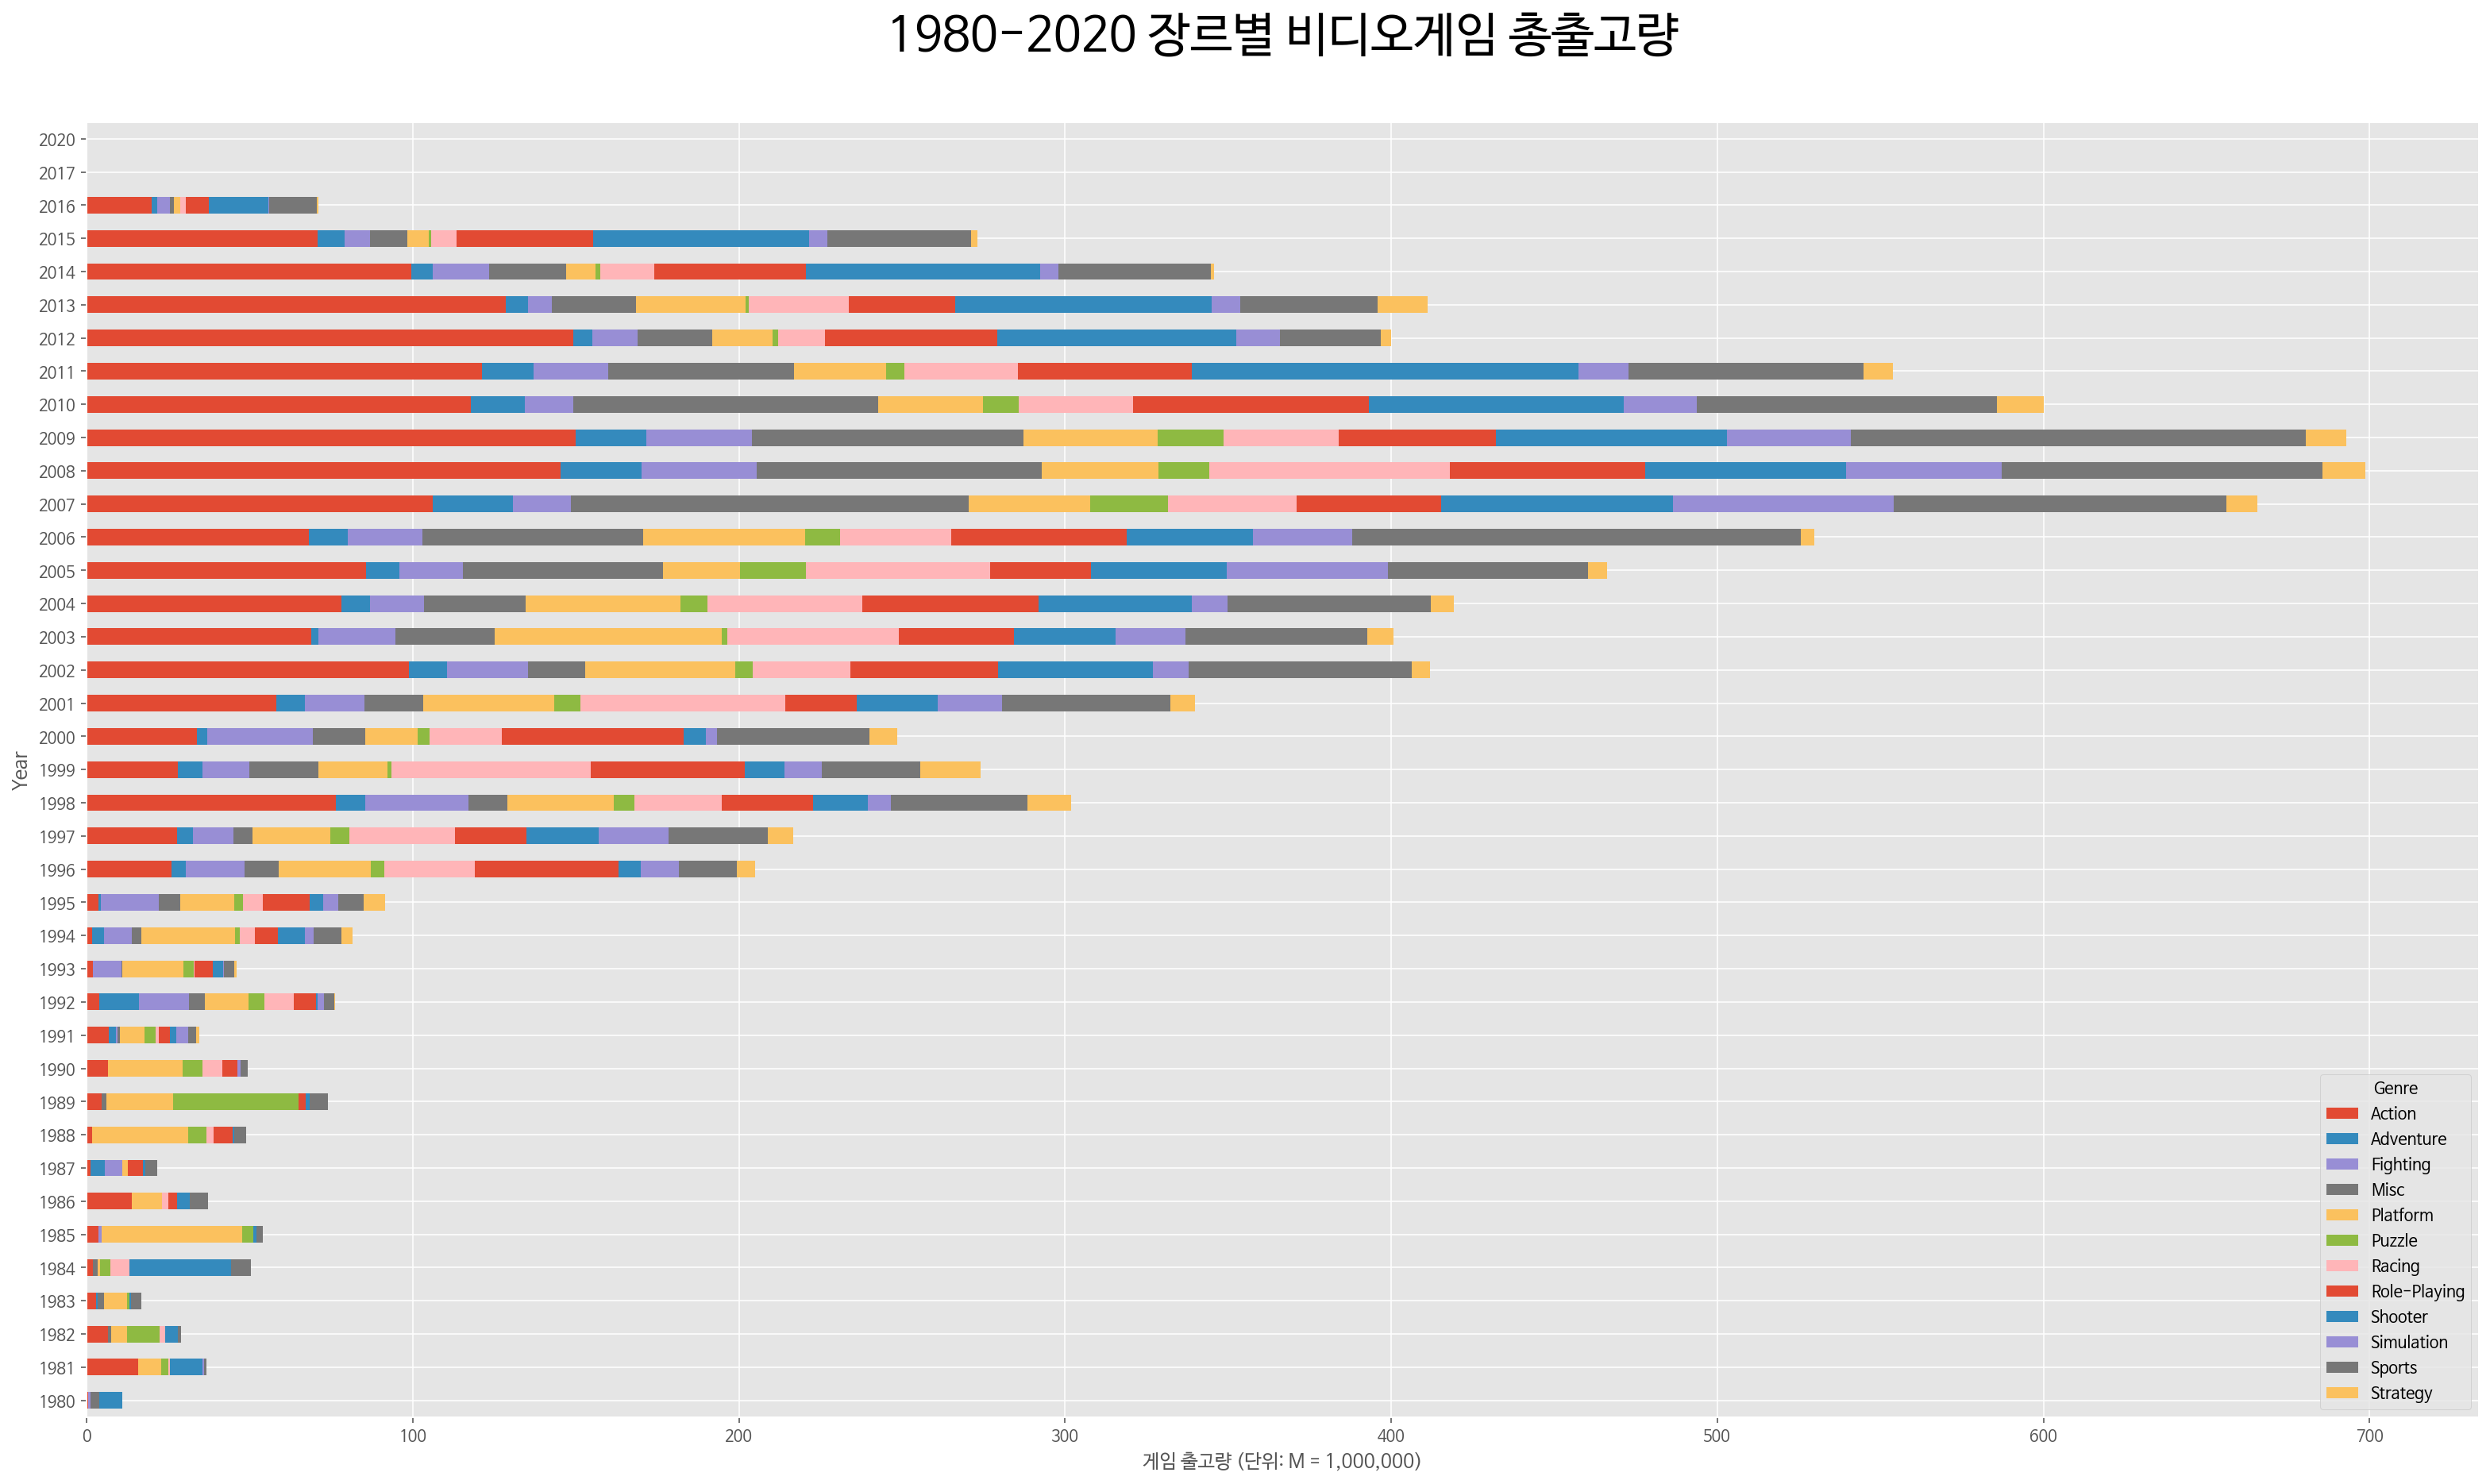

In [253]:
yg_sales_pt.plot(kind='barh', stacked=True, figsize=(27,15))
plt.xlabel('게임 출고량 (단위: M = 1,000,000)')
plt.title('1980-2020 장르별 비디오게임 총출고량\n', fontsize=30)
plt.show()

In [24]:
genre_max_df = year_genre_sales_df.groupby(by='Year').max().reset_index()
year_genre_max_sales_df = pd.merge(year_genre_sales_df, genre_max_df)
year_genre_max_sales_df.tail(10)

,Year,Genre,Total_Sales
29,2009,Action,149.84
30,2010,Action,117.68
31,2011,Action,121.16
32,2012,Action,149.16
33,2013,Action,128.54
34,2014,Action,99.46
35,2015,Action,70.77
36,2016,Action,19.85
37,2017,Role-Playing,0.04
38,2020,Simulation,0.29


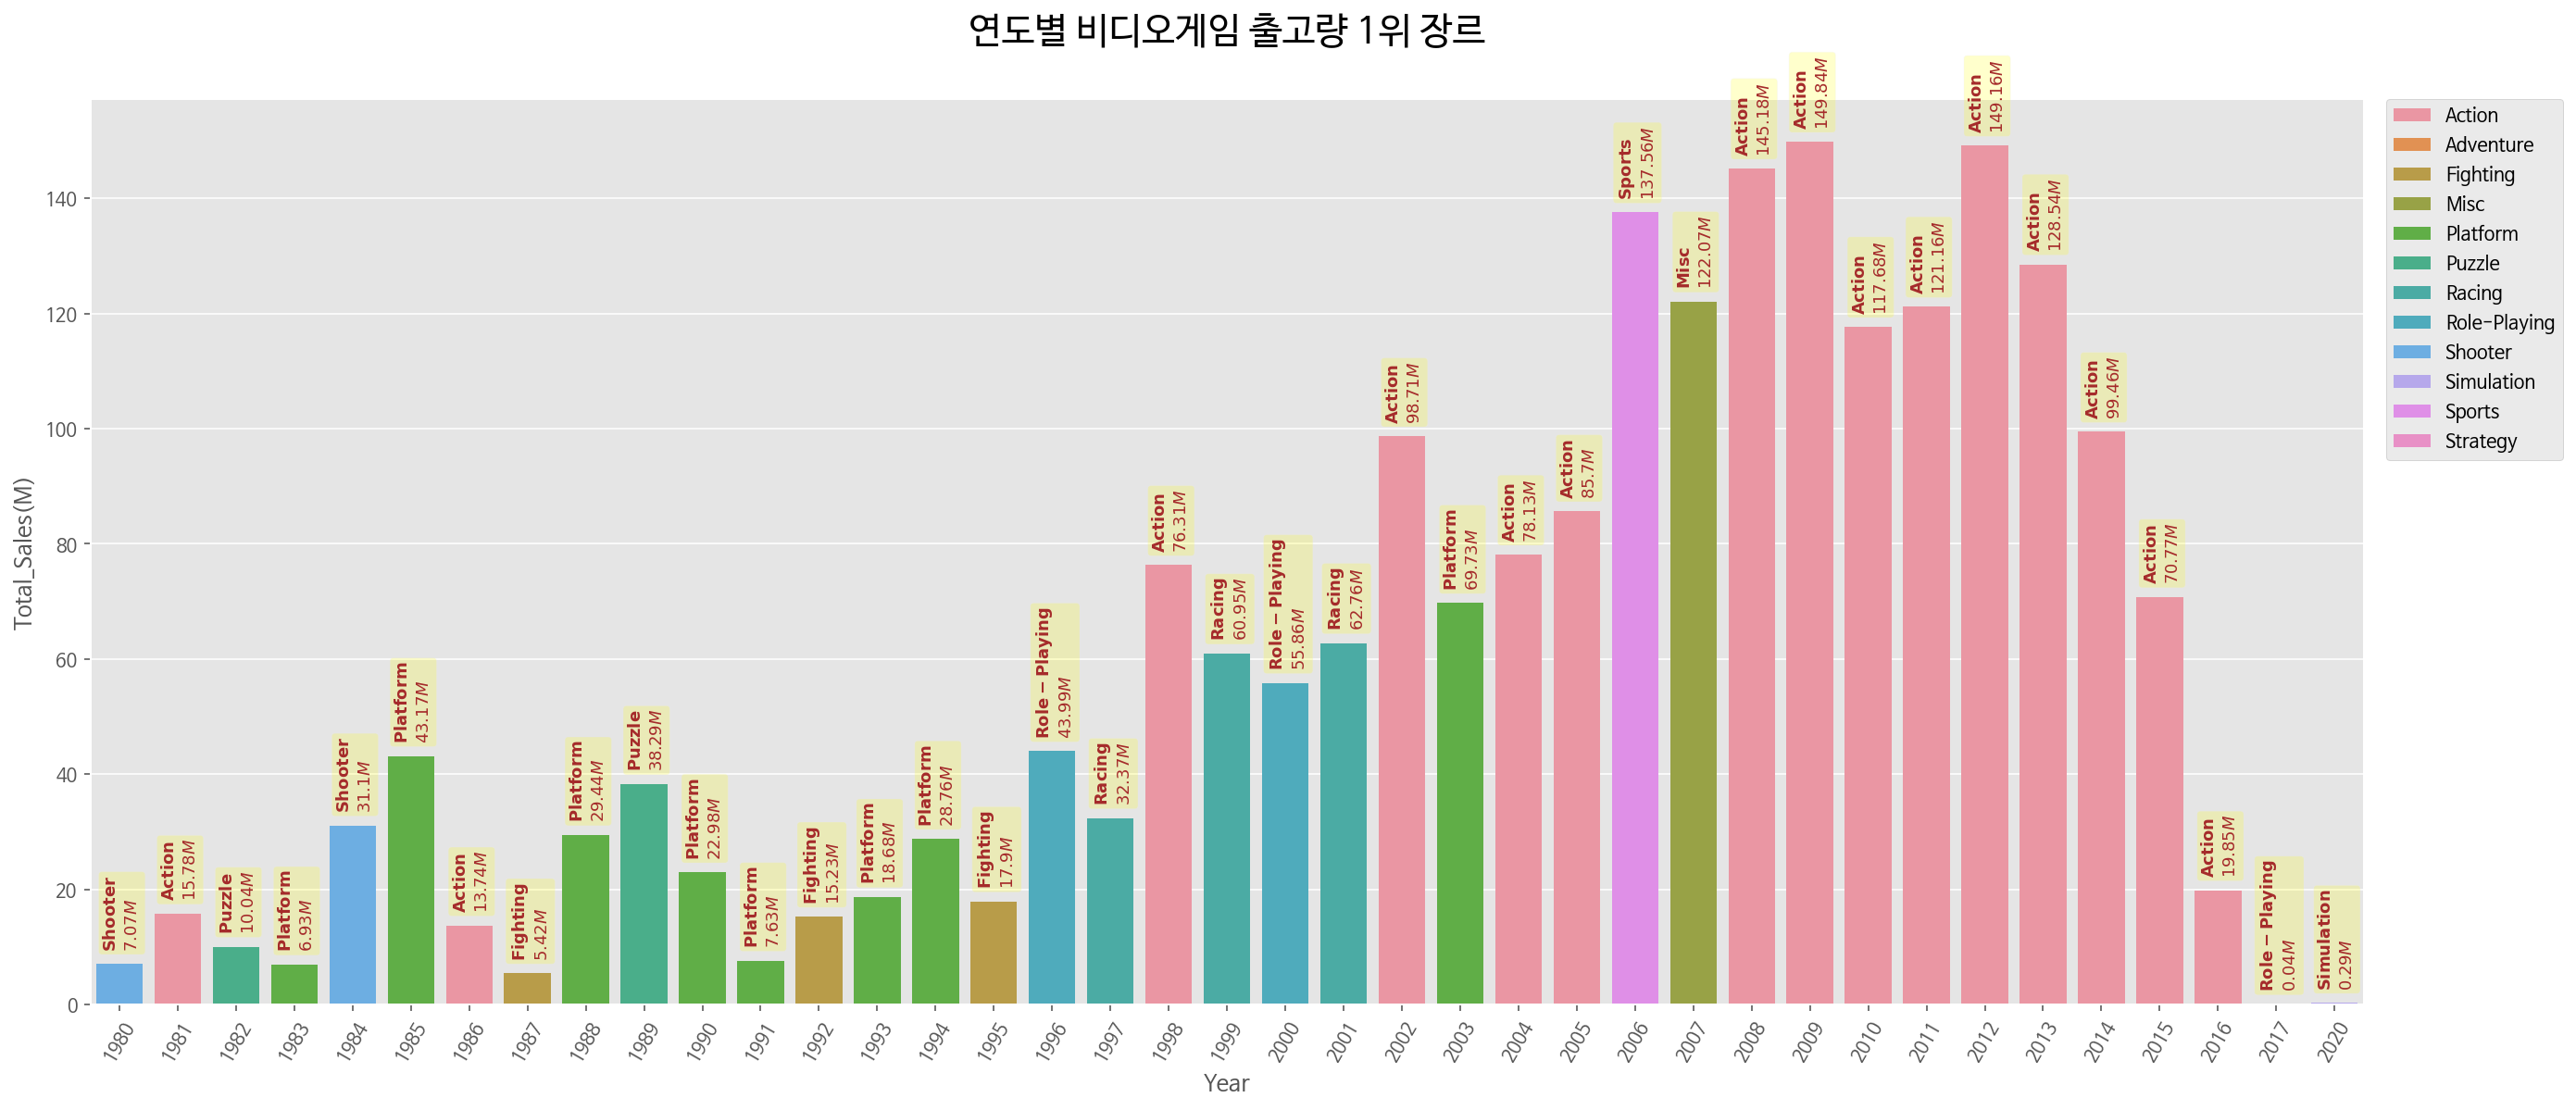

In [246]:
plt.figure(figsize=(22, 9))
sns.barplot(data=year_genre_max_sales_df, x='Year', y='Total_Sales', 
            hue='Genre', dodge=False)
for i, (g, s) in enumerate(year_genre_max_sales_df[['Genre', 'Total_Sales']].values):
    plt.annotate('$\\bf{}$\n${}M$'.format(g,round(s,2)), 
                 (i-0.3, s+3), rotation=90, fontsize=9, color='brown',
                 bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.2))
plt.ylabel('Total_Sales(M)')
plt.xticks(rotation=60)
plt.title('연도별 비디오게임 출고량 1위 장르\n', fontsize=20)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

In [26]:
genre_region_df = pd.concat((df_new[cols[3]], df_new[cols[5:9]]), axis=1)
genre_region_df.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Action,0.04,0.00,0.00,0.00
2,Action,0.17,0.00,0.00,0.01
3,Adventure,0.00,0.00,0.02,0.00
4,Misc,0.04,0.00,0.00,0.00
5,Platform,0.12,0.09,0.00,0.04


In [27]:
genre_region_df = genre_region_df.groupby(by='Genre', axis=0).sum()
genre_region_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,922.05,551.62,167.14,192.18
Adventure,104.35,64.97,52.43,17.42
Fighting,227.64,112.41,88.76,37.41
Misc,434.13,229.46,106.25,73.91
Platform,475.17,212.26,132.42,54.51
Puzzle,122.21,50.93,56.24,12.44
Racing,404.11,240.70,58.66,79.57
Role-Playing,329.65,183.37,377.40,63.30
Shooter,598.33,340.29,38.54,104.92


/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


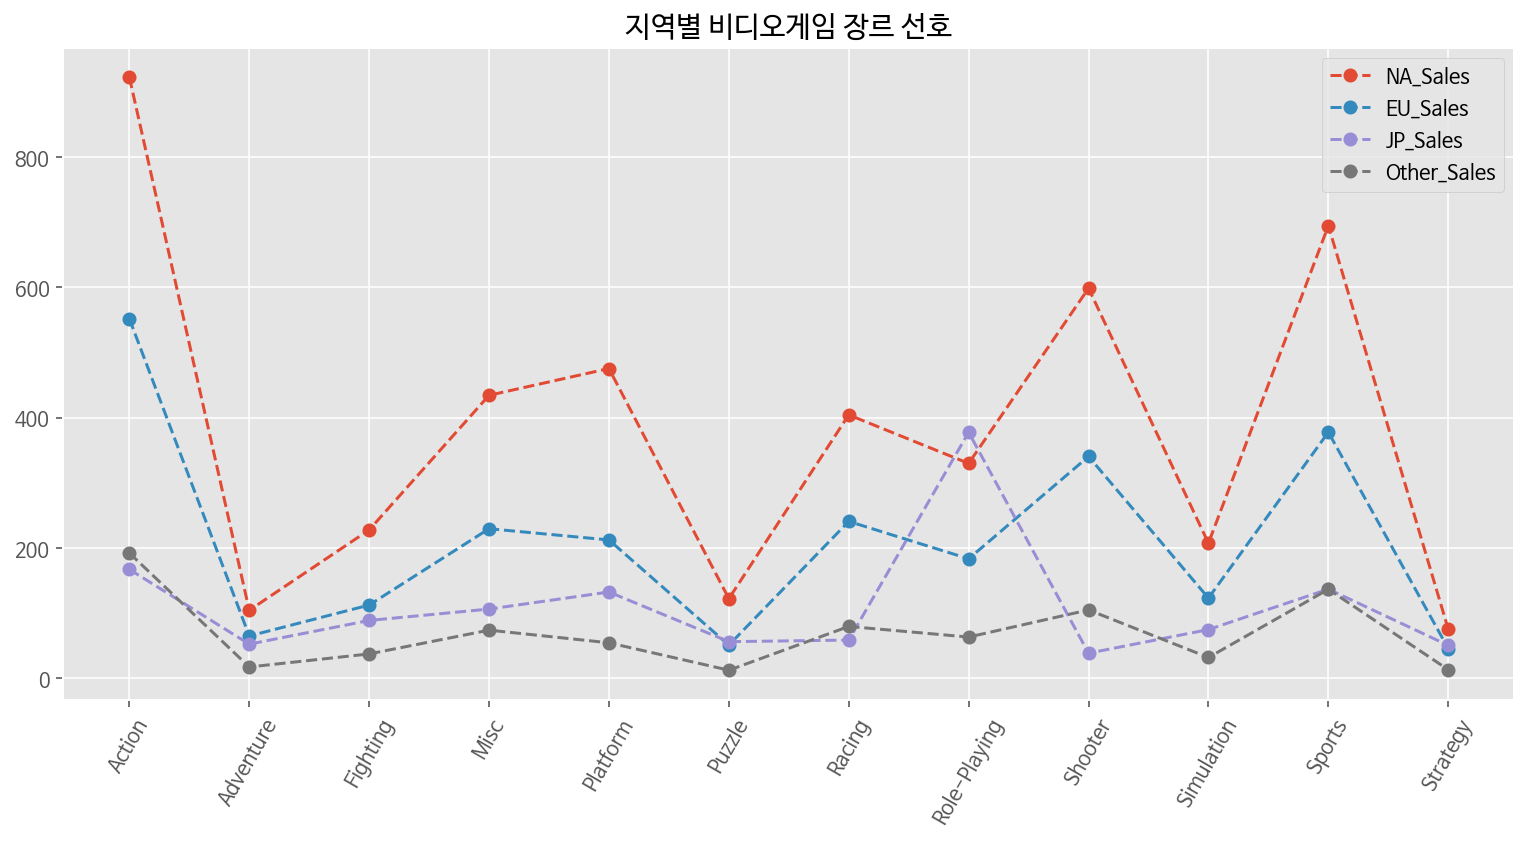

In [28]:
plt.figure(figsize=(13,6))
plt.plot(genre_region_df, 'o--')
plt.xticks(rotation=60)
plt.legend(genre_region_df.columns)
plt.title('지역별 비디오게임 장르 선호')
plt.show()

In [29]:
chi2_contingency(genre_region_df)

(778.914348415678,
 2.0675048026268984e-142,
 33,
 array([[907.09420586, 499.95285024, 264.56083472, 161.38210918],
        [118.35837687,  65.23424743,  34.52010913,  21.05726657],
        [230.71891317, 127.16273293,  67.29090304,  41.04745085],
        [417.54768776, 230.13503477, 121.78091768,  74.28635978],
        [432.69569929, 238.4839929 , 126.19894895,  76.98135886],
        [119.6697859 ,  65.95704191,  34.90259142,  21.29058077],
        [387.5040491 , 213.57622238, 113.01846492,  68.9412636 ],
        [471.96868833, 260.12964191, 137.65321103,  83.96845873],
        [535.49037271, 295.14016999, 156.17978714,  95.26967016],
        [216.2934138 , 119.21199366,  63.08359785,  38.48099469],
        [665.70586674, 366.90957052, 194.1581135 , 118.43644924],
        [ 91.38294047,  50.36650136,  26.6525206 ,  16.25803757]]))

In [78]:
standard = df_new['Total_Sales'].quantile(0.87)

In [81]:
ts_df = df_new[df_new['Total_Sales'].values > standard].sort_values('Total_Sales')
ts_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2647,Phoenix Wright: Ace Attorney,DS,2005,Adventure,Capcom,0.49,0.07,0.39,0.05,1.00
15202,DiRT 2,PS3,2009,Racing,Codemasters,0.27,0.53,0.00,0.20,1.00
7440,Sonic Generations,3DS,2011,Platform,Sega,0.44,0.46,0.01,0.09,1.00
840,EyePet,PS3,2009,Simulation,Sony Computer Entertainment,0.35,0.52,0.04,0.09,1.00
2346,Killzone: Mercenary,PSV,2013,Shooter,Sony Computer Entertainment Europe,0.25,0.49,0.04,0.22,1.00
...,...,...,...,...,...,...,...,...,...,...
3353,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
12580,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
4200,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
1965,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,41.00,1.89,1.45,0.16,44.50


In [108]:
ts_pub_df = ts_df.Publisher.value_counts().reset_index()
ts_pub_df.rename(columns={'index':'Publisher', 'Publisher':'Count'}, inplace=True)
ts_pub_df

,Publisher,Count
0,Electronic Arts,345
1,Nintendo,340
2,Activision,160
3,Sony Computer Entertainment,152
4,Ubisoft,118
...,...,...
99,Palcom,1
100,Compile,1
101,Gotham Games,1
102,Coleco,1


In [110]:
cond = (ts_pub_df['Count'].values > ts_pub_df['Count'].quantile(0.5))

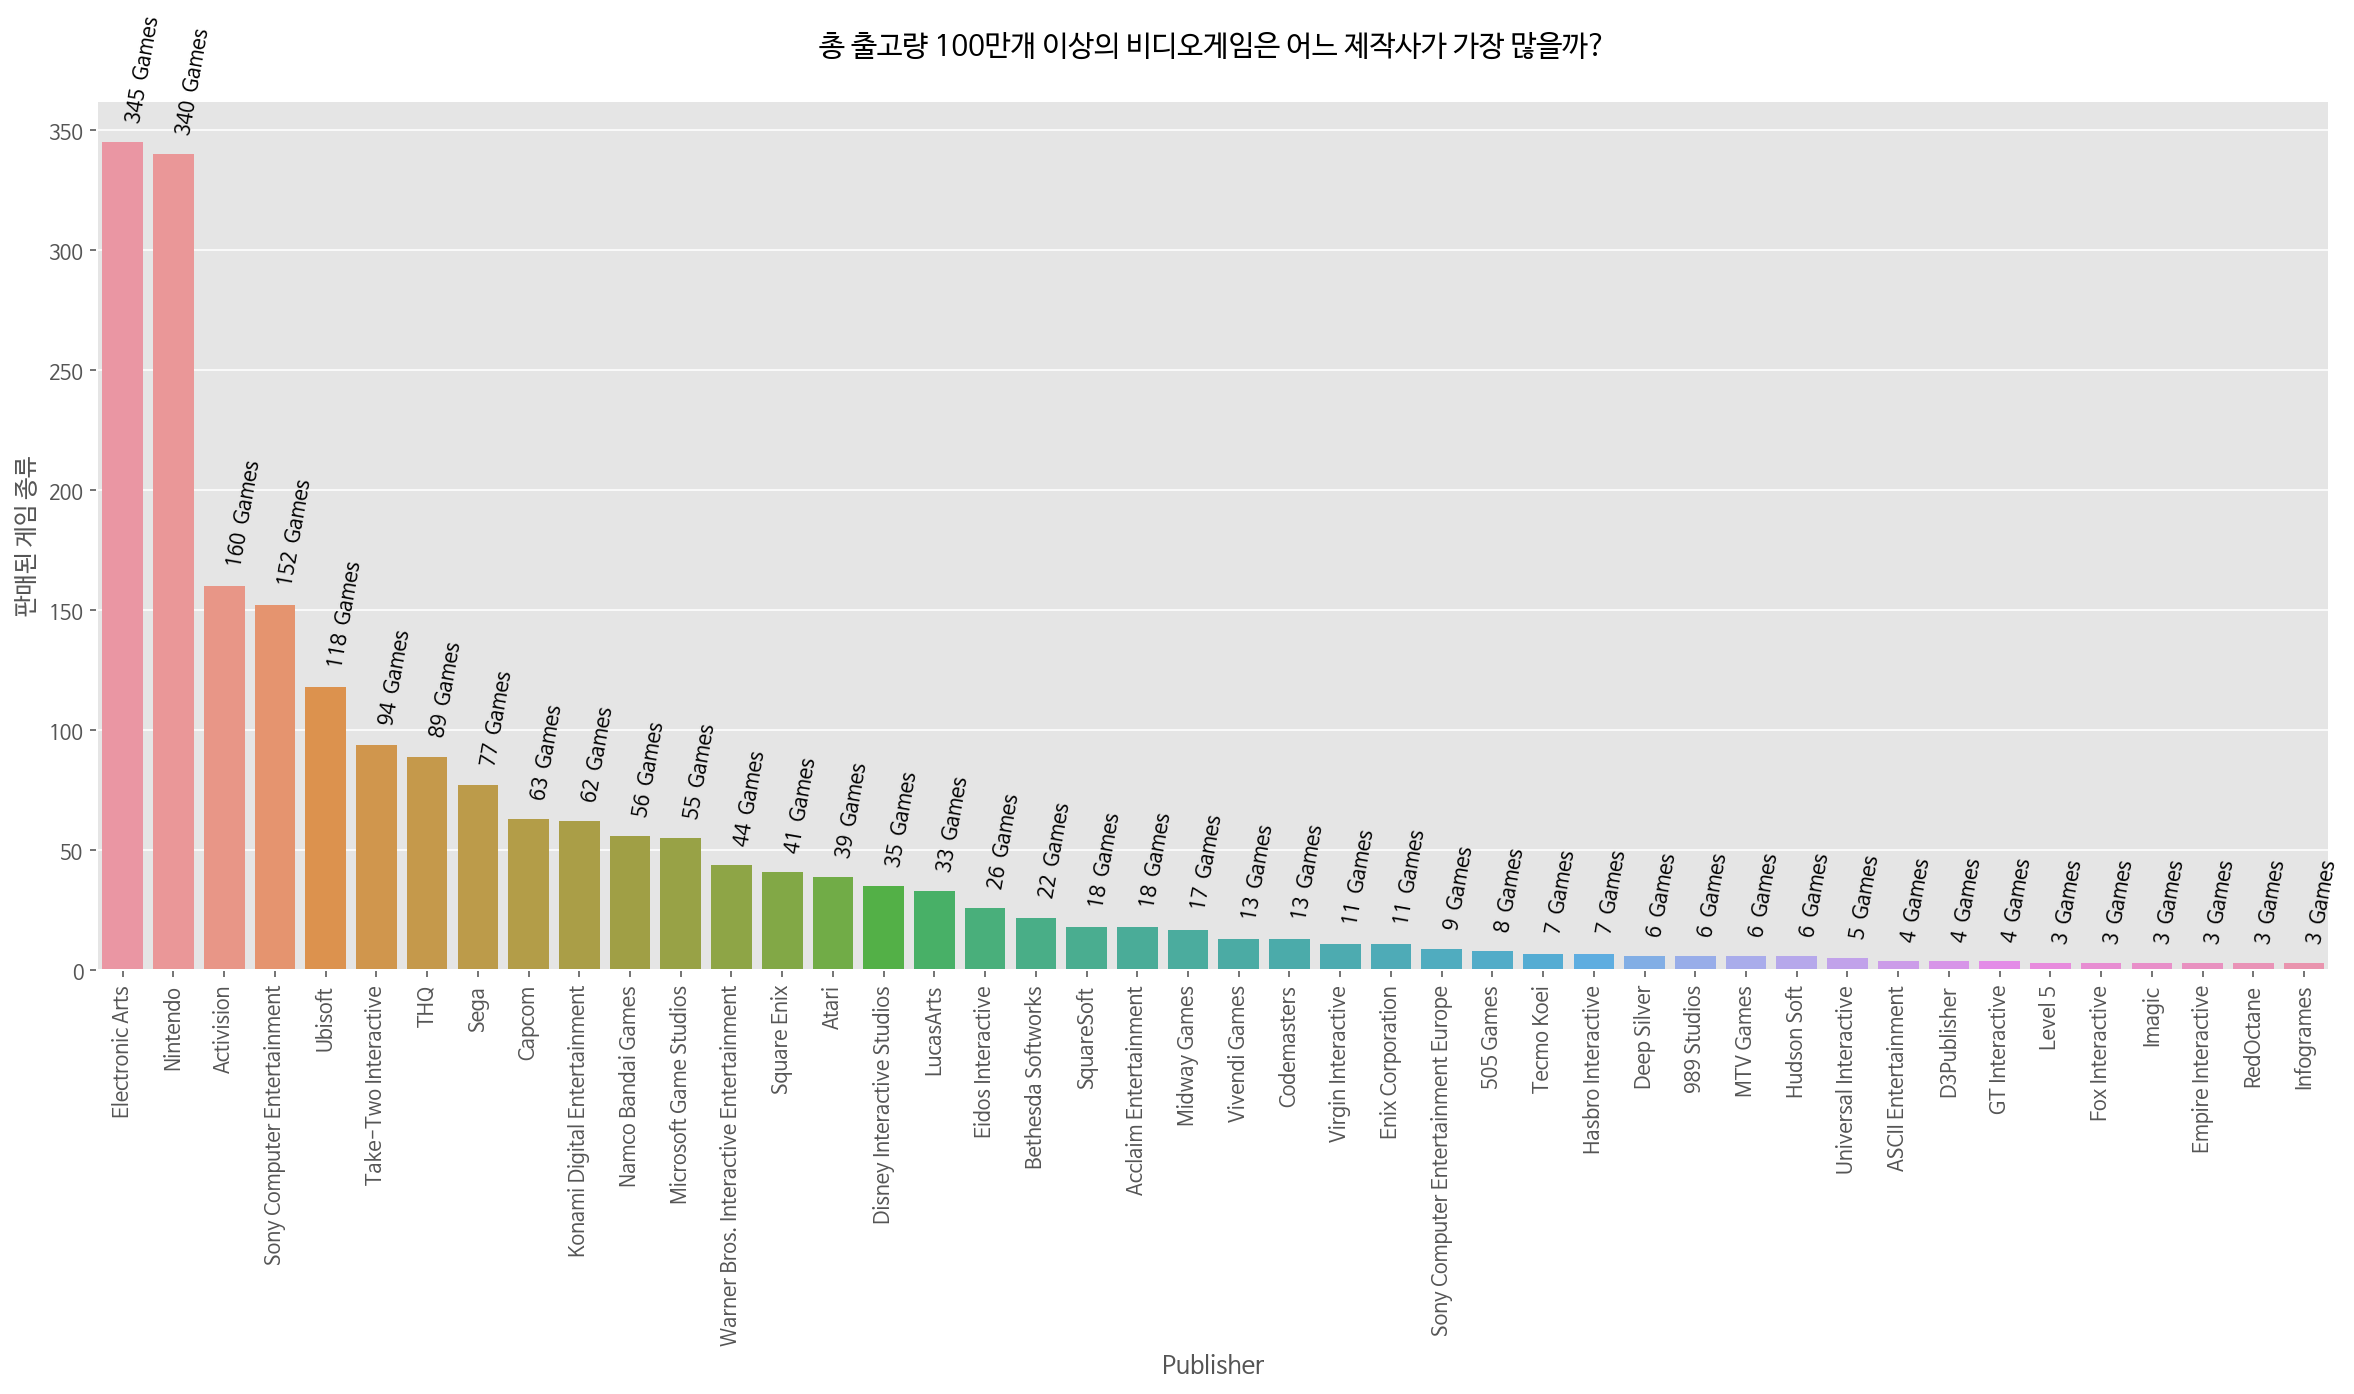

In [128]:
plt.figure(figsize=(20,8))
sns.barplot(data=ts_pub_df[cond], x='Publisher', y='Count')
for i, (pub, count) in enumerate(ts_pub_df[cond].values):
    plt.annotate('{}  Games'.format(count), (i, count+10), rotation=80)
plt.xticks(rotation=90)
plt.ylabel('판매된 게임 종류')
plt.title('총 출고량 100만개 이상의 비디오게임은 어느 제작사가 가장 많을까?\n')
plt.show()

In [141]:
ts_gen_df = ts_df.Genre.value_counts().reset_index()
ts_gen_df.rename(columns={'index':'Genre', 'Genre':'Count'}, inplace=True)
ts_gen_df.sort_values('Count', inplace=False)
ts_gen_df

,Genre,Count
0,Action,431
1,Sports,308
2,Shooter,252
3,Role-Playing,207
4,Platform,199
5,Racing,189
6,Misc,173
7,Fighting,124
8,Simulation,99
9,Puzzle,55


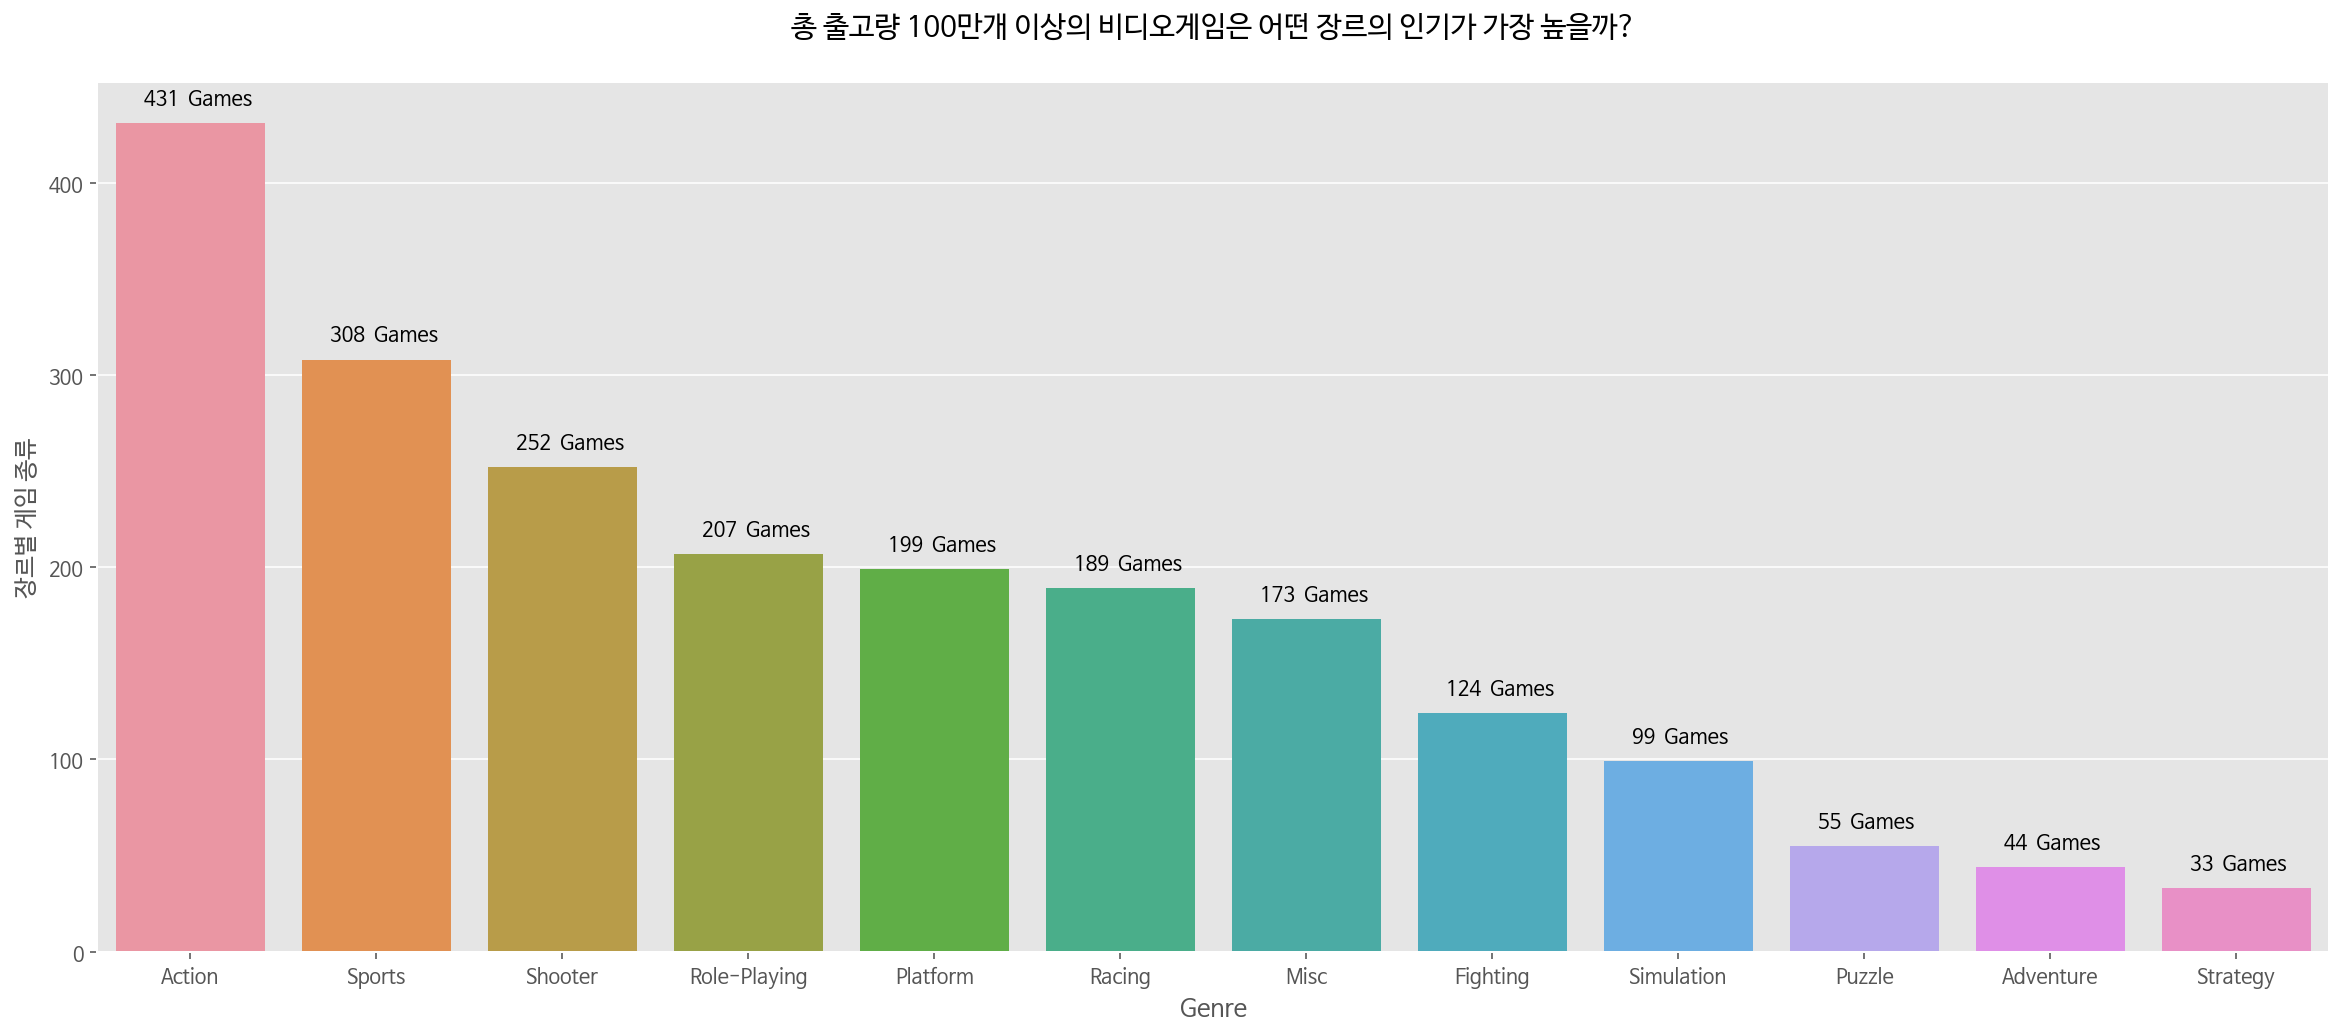

In [155]:
plt.figure(figsize=(20,8))
sns.barplot(data=ts_gen_df, x='Genre', y='Count', 
            order=ts_gen_df.sort_values('Count', ascending=False).Genre)
for i, (gen, count) in enumerate(ts_gen_df.values):
    plt.annotate('{}  Games'.format(count), (i-0.25, count+10))
plt.ylabel('장르별 게임 종류')
plt.title('총 출고량 100만개 이상의 비디오게임은 어떤 장르의 인기가 가장 높을까?\n')
plt.show()

In [126]:
top_selling_15 = df_new['Total_Sales'].isin(df_new['Total_Sales'].sort_values(ascending=False).head(15))
ts15_df = df_new[top_selling_15].sort_values('Total_Sales', ascending=False)
ts15_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2909,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1965,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,41.00,1.89,1.45,0.16,44.50
4200,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12580,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3353,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
9830,Super Mario Bros. 3,GBA,2003,Platform,Nintendo,29.30,1.25,0.83,0.20,31.58
7830,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
3590,Final Fantasy IX,PS,2000,Role-Playing,SquareSoft,1.62,0.77,27.80,0.14,30.33
1204,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6938,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01


In [181]:
pf_gen_ct = pd.crosstab(ts_df.Platform, ts_df.Genre)
pf_gen_ct

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,2,0,0,2,6,3,1,0,9,0,0,0
3DS,12,0,2,1,8,1,1,17,0,4,1,0
DC,1,1,0,0,1,0,1,0,0,0,2,0
DS,25,12,0,24,13,15,4,25,1,25,3,3
GB,3,4,0,6,12,8,2,8,1,2,5,3
GBA,11,1,1,5,23,4,4,18,0,1,1,1
GC,9,1,3,6,6,2,5,5,3,2,4,3
GEN,1,0,3,0,5,0,1,0,0,0,2,0
N64,7,0,6,4,7,1,7,1,4,4,7,3


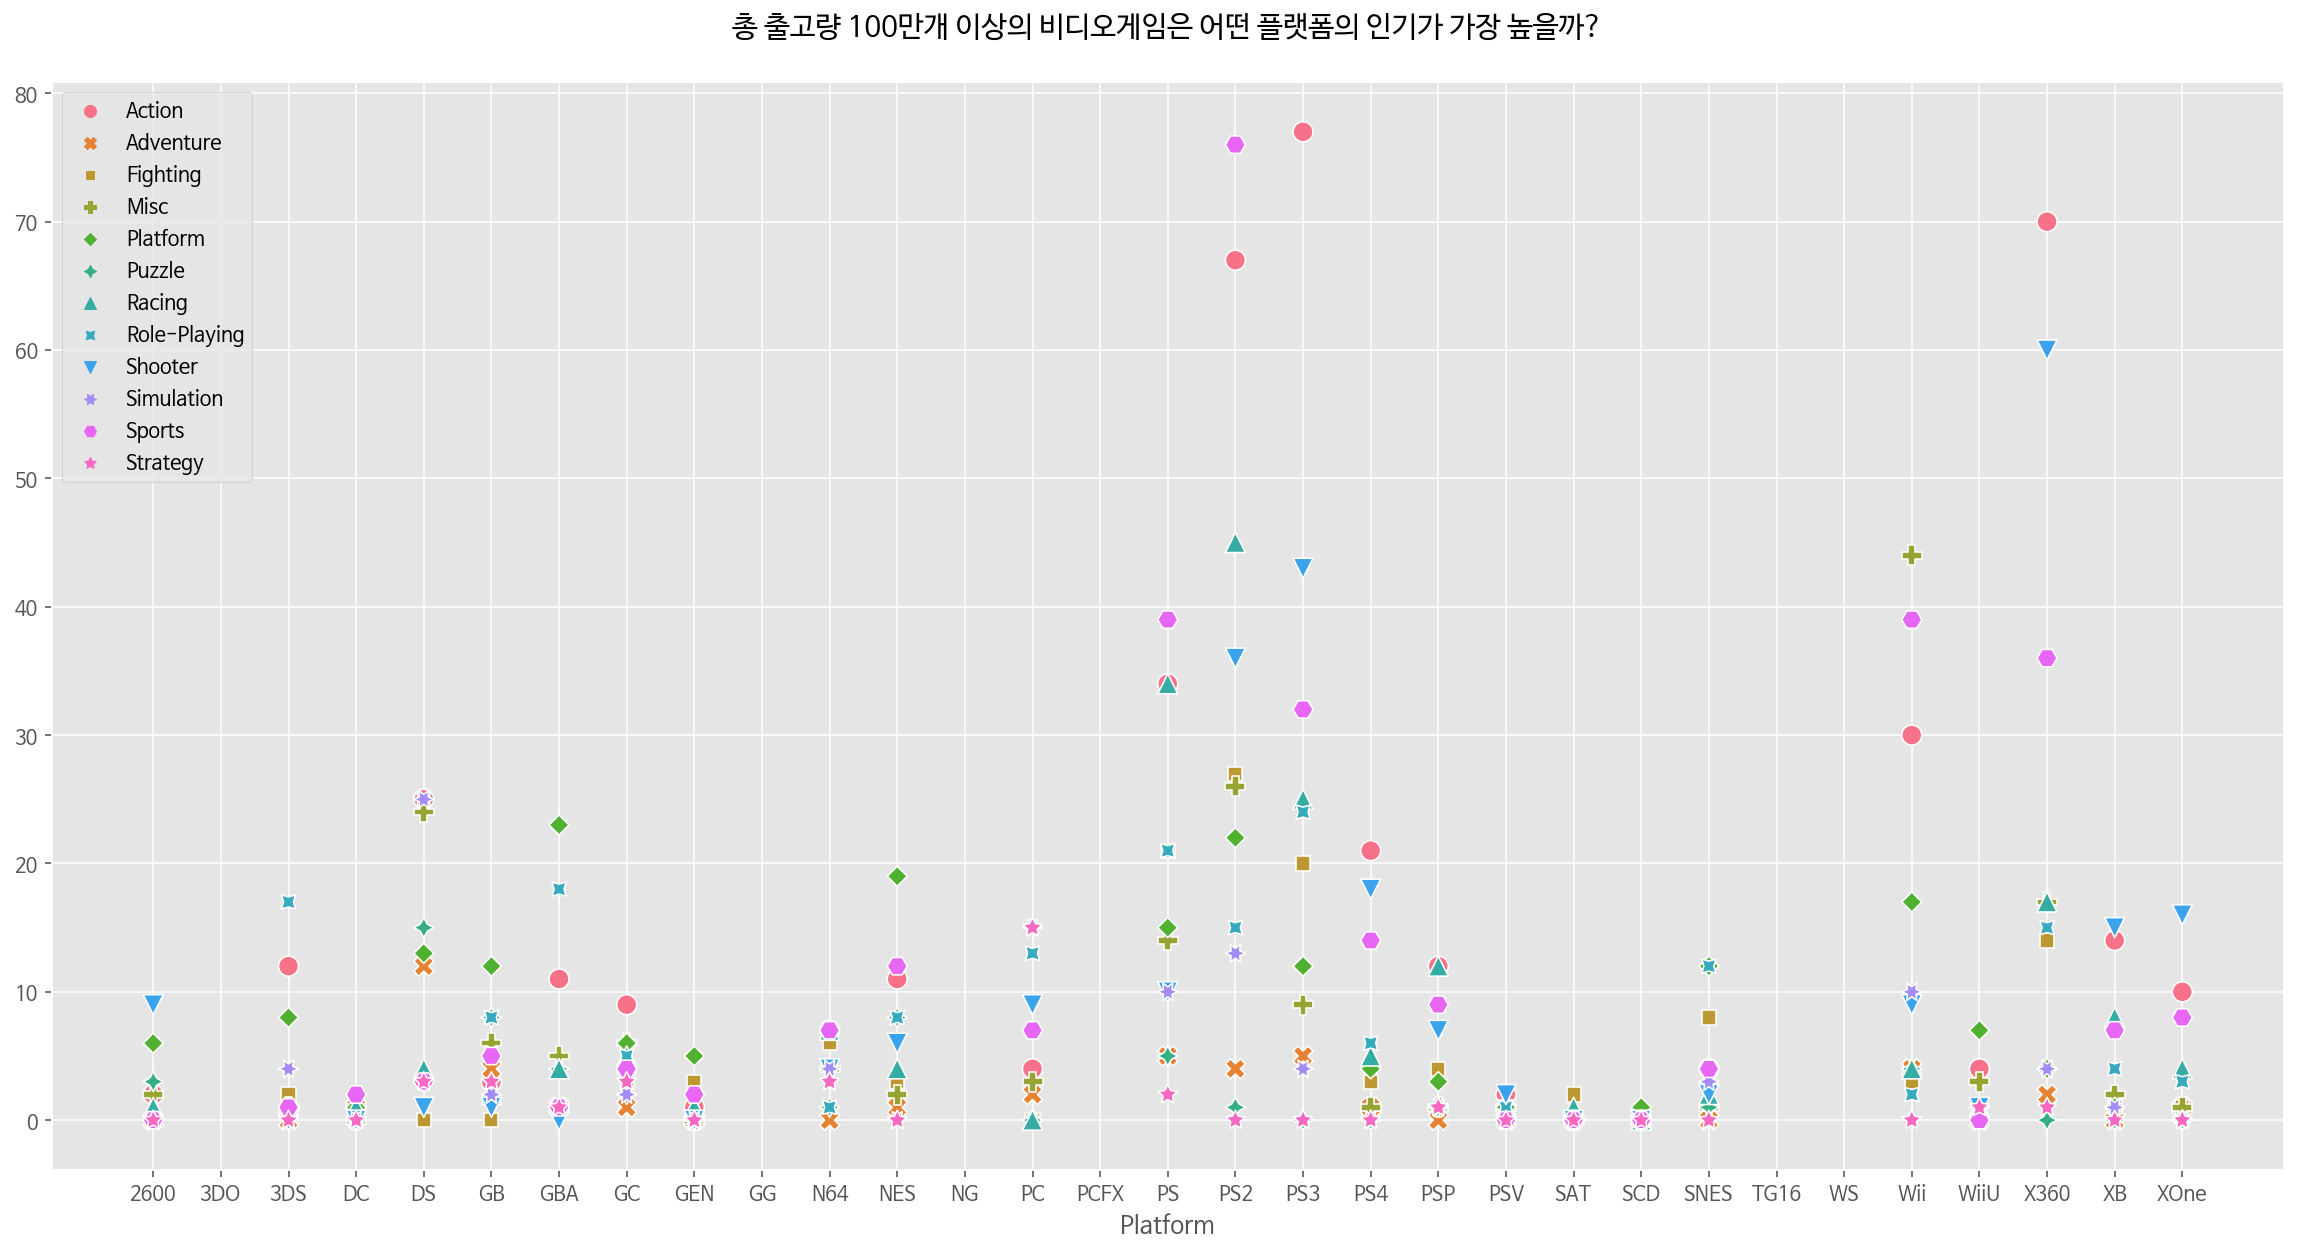

In [214]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=pf_gen_ct, s=100)
plt.title('총 출고량 100만개 이상의 비디오게임은 어떤 플랫폼의 인기가 가장 높을까?\n')
plt.legend(loc='upper left')
plt.show()